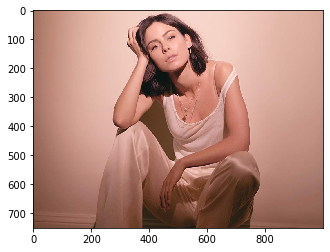

In [3]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('lena.jpg')
plt.imshow(img)
plt.show()

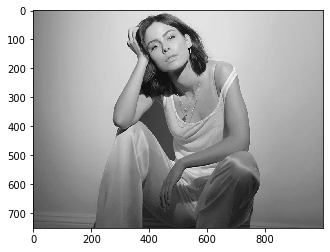

In [4]:
bw = img.mean(axis=2)
bw.shape
plt.imshow(bw, cmap = 'gray')
plt.show()

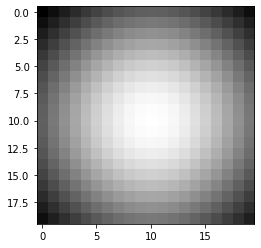

In [5]:
w = np.zeros((20,20))
for i in range(20):
    for j in range(20):
        dist = (i-10)**2 + (j-10)**2
        w[i,j] = np.exp(-dist/200)
plt.imshow(w, cmap = 'gray')
plt.show()

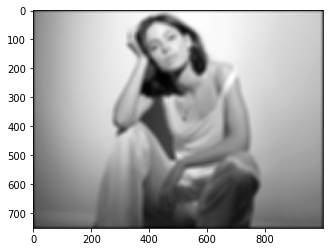

In [6]:
out = convolve2d(bw,w,mode='same')
plt.imshow(out,cmap='gray')
plt.show()

In [54]:
out.shape

(750, 1000)

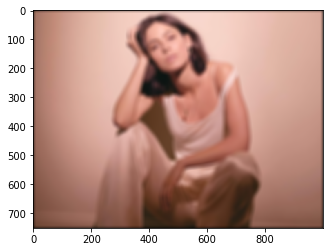

In [7]:
out3 = np.zeros(img.shape)
for i in range(3):
    out3[:,:,i] = convolve2d(img[:,:,i], w, mode='same')
    
out3 /= out3.max()
plt.imshow(out3)
plt.show()

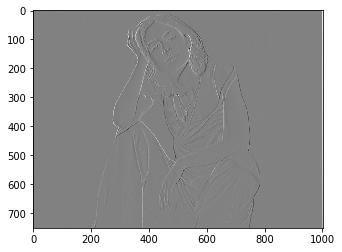

In [17]:
Hx = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
], dtype = np.float32)

Hy = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
], dtype = np.float32)

#detecting horizental edges
Gx = convolve2d(bw,Hx)
plt.imshow(Gx, cmap='gray')
plt.show()

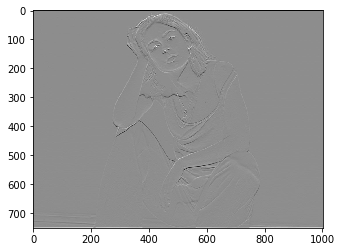

In [20]:
#detecting vertical edges
Gy = convolve2d(bw,Hy)
plt.imshow(Gy, cmap='gray')
plt.show()

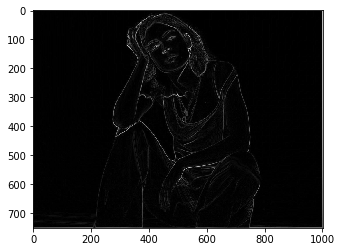

In [21]:
G = np.sqrt(Gx*Gx + Gy*Gy)
plt.imshow(G, cmap='gray')
plt.show()